 <a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width = 300, align = "center"></a>

<h1 align=center><font size = 5>Data Analysis with Python</font></h1>

# House Sales in King County, USA

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

<b>id</b> : A notation for a house

<b> date</b>: Date house was sold


<b>price</b>: Price is prediction target


<b>bedrooms</b>: Number of bedrooms


<b>bathrooms</b>: Number of bathrooms

<b>sqft_living</b>: Square footage of the home

<b>sqft_lot</b>: Square footage of the lot


<b>floors</b> :Total floors (levels) in house


<b>waterfront</b> :House which has a view to a waterfront


<b>view</b>: Has been viewed


<b>condition</b> :How good the condition is overall

<b>grade</b>: overall grade given to the housing unit, based on King County grading system


<b>sqft_above</b> : Square footage of house apart from basement


<b>sqft_basement</b>: Square footage of the basement

<b>yr_built</b> : Built Year


<b>yr_renovated</b> : Year when house was renovated

<b>zipcode</b>: Zip code


<b>lat</b>: Latitude coordinate

<b>long</b>: Longitude coordinate

<b>sqft_living15</b> : Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area


<b>sqft_lot15</b> : LotSize area in 2015(implies-- some renovations)

Required Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Importing Data Sets 

 Load the csv:  

In [3]:
file_name='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)


We use the method <code>head</code> to display the first 5 columns of the dataframe.

In [66]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503



Display the data types of each column using the attribute dtype, then take a screenshot and submit it, include your code in the image. 

In [67]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

All of the data types fulfil the expectations, so I don't have to change any of them. 
Using the method describe to obtain a statistical summary of the dataframe.

In [68]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data Wrangling


I'm gonna drop the collumns <code>"id"</code>  and <code>"Unnamed: 0"</code> from axis 1 using the method <code>drop()</code> since they are not relevant for the study. Then I used the method <code>describe()</code> to obtain a statistical summary of the data. 

In [4]:
df.drop("id", axis = 1, inplace = True)
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We have missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>

In [70]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10



Therefore I replaced the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code> using the method <code>replace()</code>. 

In [5]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)


I also replace the missing values of the column <code>'bathrooms'</code> with the mean of the column  <code>'bathrooms' </code> using the method <code>replace()</code>.

In [6]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

Now there are no missing values in the dataframe. 

In [30]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Exploratory Data Analysis

Here I count the number of unique floors for all the houses in the dataframe. 


In [37]:
n_floors_df = df['floors'].value_counts().to_frame()
n_floors_df

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


One can clearly see the the predominant number of floors is either 1 or 2.


Determine whether houses with a waterfront view or without a waterfront view have more price outliers.

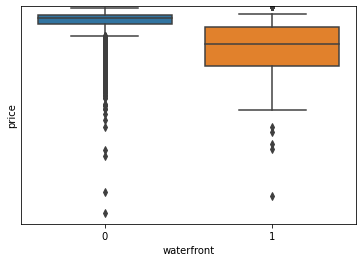

In [44]:
df[['waterfront']].value_counts()
sns.boxplot(x=df['waterfront'])
ax = sns.boxplot(x='waterfront', y='price', data=df)


Use the function <code>regplot</code>  in the seaborn library  to  determine if the feature <code>sqft_above</code> is negatively or positively correlated with price.

(0.0, 8081250.0)

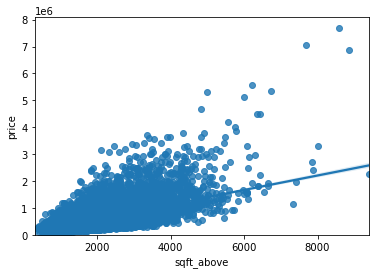

In [45]:
sns.regplot(x = 'sqft_above', y = 'price', data = df)
plt.ylim(0,)


One can use the Pandas method <code>corr()</code>  to find the feature other than price that is most correlated with price.

In [46]:
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

For instance, the predictor long has a weak correlation with price. Let's explore its linear fit.

One can fit a linear regression model using the  longitude feature <code>'long'</code> and  calculate the R^2.

In [47]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149029567

The training R^2 << 1 is a clear indicator that the fit is really bad. 


Fit a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code> then calculate the R^2. 

In [7]:
x_s = df[['sqft_living']]
y_s = df[['price']]
lm = LinearRegression()
lm.fit(x_s,y_s)
lm.score(x_s,y_s)

0.4928532179037931

Using only the predictor <code>'sqft_living'</code> to perform a simple linear regression resulted in a somehow weak model. Let's try to improve the model using more predictors. I didn't use the predictor with low correlation to price. Only used the predictors with correlation > 0.2. 


Fitting a linear regression model to predict the <code>'price'</code> using the list of features:

In [8]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

Then calculate the R^2. Take a screenshot of your code.

In [9]:
x_multi = df[features]
y_multi = df['price']
lm.fit(x_multi,y_multi)
lm.score(x_multi,y_multi)

0.6576978909219439

The fit increased substantially using more predictors, as expected. 




Create a list of tuples, the first element in the tuple contains the name of the estimator:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple  contains the model constructor 

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [10]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

Now I will use a pipeline object to improve the model.
I use the list to create a pipeline object to predict the 'price' and fit the object using the features in the list <code>features</code>. Then I calculate the R^2 for comparison.

In [11]:
pipe = Pipeline(Input)
pipe.fit(x_multi, y_multi)
pipe.score(x_multi, y_multi)

0.7505626144247712

The training R^2 increased substantially. However, one still needs to evaluate the model as a predictor. 

# Model Evaluation and Refinement

Import the necessary modules:

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


Split the data into training and testing sets. I used 85% of the data as training data. 

In [13]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371



Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1. Calculate the R^2 using the test data. 


In [14]:
from sklearn.linear_model import Ridge

In [15]:
rm = Ridge(alpha = 0.1)
rm.fit(x_train, y_train)
print('R^2 using the train data: ',rm.score(x_train,y_train))
print('R^2 using the test data: ', rm.score(x_test,y_test))

R^2 using the train data:  0.659437853495024
R^2 using the test data:  0.6478759163939113


There is no substantial variation between the training R^2 and the test R^2


Now I perform a second order polynomial transform on both the training data and testing data. Then I create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1 and calculate the R^2 utilising the test data provided. 


In [16]:
rr1 = Ridge(alpha = 0.1)
pr = PolynomialFeatures(degree = 2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
rr1.fit(x_train_pr,y_train)
print('R^2 using the train data: ',rr1.score(x_train_pr,y_train))
print('R^2 using the test data: ', rr1.score(x_test_pr,y_test))

R^2 using the train data:  0.7418167438774625
R^2 using the test data:  0.7002744250940708


As we can see the traing and test R^2 increased substantially.

Let's now make an analysis for increasing plynomial degree

Text(0.5, 1.0, 'R^2 Using Test Data')

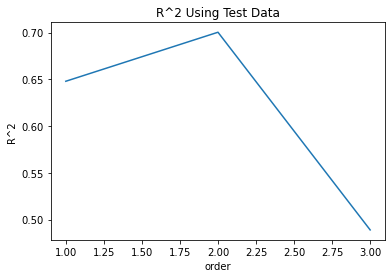

In [18]:
Rsqu_test = []

order = [1, 2, 3]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train)
    x_test_pr = pr.fit_transform(x_test)    
    #Different order will create different x_train_pr, which will tell the LinearRegression object lr 
    #to train the model for polynomials of order n
    rr1.fit(x_train_pr, y_train)
    Rsqu_test.append(rr1.score(x_test_pr, y_test))
#Plot
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')


The R^2 using test data reached a maximum for polynomials of order 2. Let's now analyze the optimal alpha for polynomials of order 2.

In [25]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test) 

Rsqu_test = []
Rsqu_train = []
dummy1 = []
#Range for the values of alpha
Alpha = 0.001*np.array(range(0,100))
for alpha in Alpha:
    RigeModel = Ridge(alpha = alpha)
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))
    

Let's plot the results

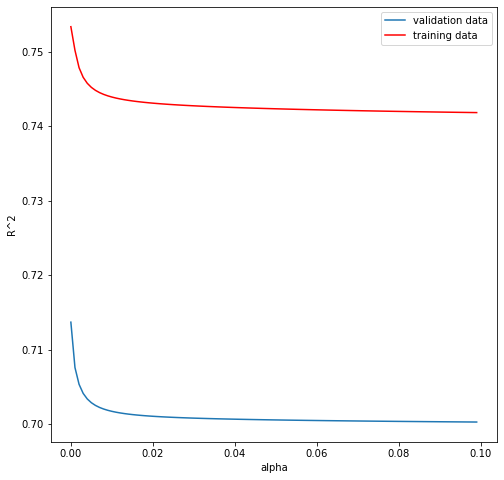

In [26]:
width = 8
height = 8
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label = 'validation data')
plt.plot(Alpha, Rsqu_train, 'r', label = 'training data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

This graph leads me to conclude that a value of 0 to the parameter alpha is adequate, since this values results in maximum R^2 values. 

Let's evaluate the accuracy of this model

In [30]:
final_model = LinearRegression()

final_model.fit(x_train_pr, y_train)
print('Training R^2: ', final_model.score(x_train_pr, y_train))
print('Test R^2: ', final_model.score(x_test_pr, y_test))

Training R^2:  0.753914247644843
Test R^2:  0.7117276115950246


This values of R^2 refect that more a less 75% of the inherent variability of the observations is explained by the model. 

Distribution Plot

C:\Users\35191\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\35191\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

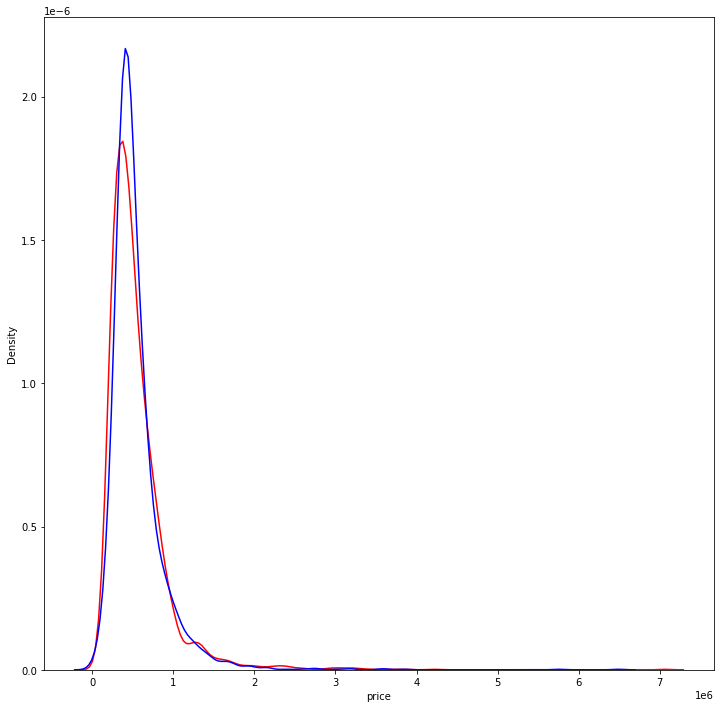

In [33]:
width = 12
height = 12
plt.figure(figsize=(width, height))

ax1 = sns.distplot(y_test, hist = False, color = 'r', label = 'Actual test value')

sns.distplot(final_model.predict(x_test_pr), hist = False, color = 'b', label = 'Predicted Test Values', ax = ax1)


The Distributed Plot reflects the accuracy of the model predictions. 